%%html
<a href="https://colab.research.google.com/github/amir-jafari/SOM/blob/main/examples/Tabular/Iris/notebook/iris_training.ipynb" target="_blank">
  <button style="color: white; background-color: #1a73e8; padding: 10px; border: none; text-align: center; text-decoration: none; display: inline-block; font-size: 16px; margin: 4px 2px; cursor: pointer; border-radius: 8px;">
    Open in Colab
  </button>
</a>


In this notebook we will see the basics of how to use NNSOM with Iris dataset.

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install NNSOM
    !pip install --upgrade NNSOM

In [2]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *

Set the parameters used for NNSOM

In [3]:
# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

# Training Parameters
Epochs = 500
Steps = 100
Init_neighborhood = 3

# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

NNSOM relies on the Python ecosystem to import and preprocess the data. For this example we will load the Iris dataset dataset using numpy and pandas:

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

# Define the normalize funciton
scaler = MinMaxScaler(feature_range=(-1, 1))

## Training SOM

We will use SOMPlots which is child class of SOM because we want to plot SOM.

In [5]:
som = SOMPlots(Dimensions)
som.init_w(X, norm_func=scaler.fit_transform)
som.train(X, Init_neighborhood, Epochs, Steps, norm_func=scaler.fit_transform)

Beginning Initialization
Current Time = 01:34:02
Ending Initialization
Current Time = 01:34:02
Beginning Training
Current Time = 01:34:02
50
Current Time = 01:34:02
100
Current Time = 01:34:02
150
Current Time = 01:34:02
200
Current Time = 01:34:02
250
Current Time = 01:34:02
300
Current Time = 01:34:02
350
Current Time = 01:34:02
400
Current Time = 01:34:02
450
Current Time = 01:34:02
500
Current Time = 01:34:02
Ending Training
Current Time = 01:34:02


### Save the trained model

In [6]:
import os
from google.colab import drive

drive.mount('/content/drive')

abs_path = "/content/drive/MyDrive/Colab Notebooks/NNSOM/Examples/Iris/" + os.sep

Trained_SOM_File = "SOM_Model_iris_Epoch_" + str(Epochs) + '_Seed_'  + str(SEED) + '_Size_' + str(SOM_Row_Num) + '.pkl'

som.save_pickle(Trained_SOM_File, abs_path)

Mounted at /content/drive


## Extract SOM Cluster Details

After training the SOM, information on which clusters the training data were classified into can be obtained. This can be used to visualize various additional variables on the topology of the SOM.

**clust**: sequence of vectors with indices of input data that are in each cluster sorted by distance from cluster center.

dist: sequence of vectors with distance of input data that are in each cluster sorted by distance fro cluster center.

mdist: 1d array with maximum distance in each cluster

clustSize: 1d array with number of items in each cluster

In [7]:
clust, dist, mdist, clustSize = som.cluster_data(X)

## Error Analysis

In [8]:
# Find quantization error
quant_err = som.quantization_error(dist)
print('Quantization error: ' + str(quant_err))

Quantization error: 0.2362461085120295


In [9]:
# Find topological error
top_error_1, top_error_1_2 =  som.topological_error(X)
print('Topological Error (1st neighbor) = ' + str(top_error_1) + '%')
print('Topological Error (1st and 2nd neighbor) = ' + str(top_error_1_2) + '%')

Topological Error (1st neighbor) = 14.0%
Topological Error (1st and 2nd neighbor) = 0.0%


In [10]:
# Find Distortion Error
som.distortion_error(X)

Distortion (d=1) = 1.4298483410588656
Distortion (d=2) = 2.1398364189616284
Distortion (d=3) = 2.013895098651144


## Visualize the SOM

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data_dict = {
    "data": X,
    "target": y,
    "clust": clust,
}

### SOM Topology

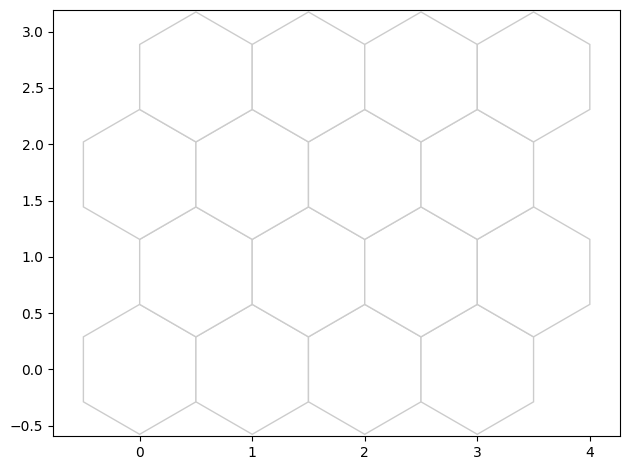

In [22]:
fig, ax, patches = som.plot('top')
plt.show()

SOM Topology with neuron number

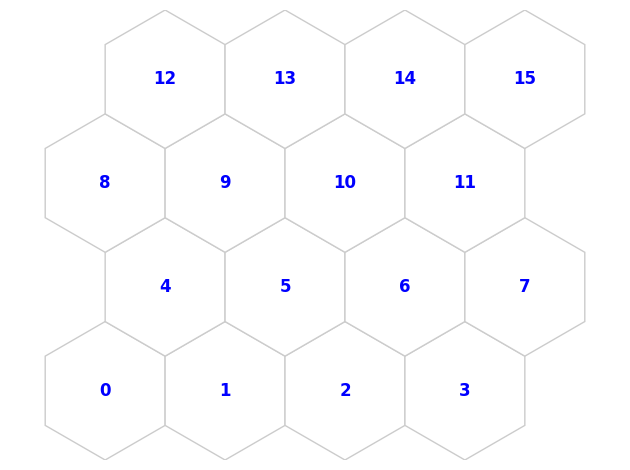

In [23]:
fig, ax, pathces, text = som.plot('top_num')
plt.show()

Hit Histogram

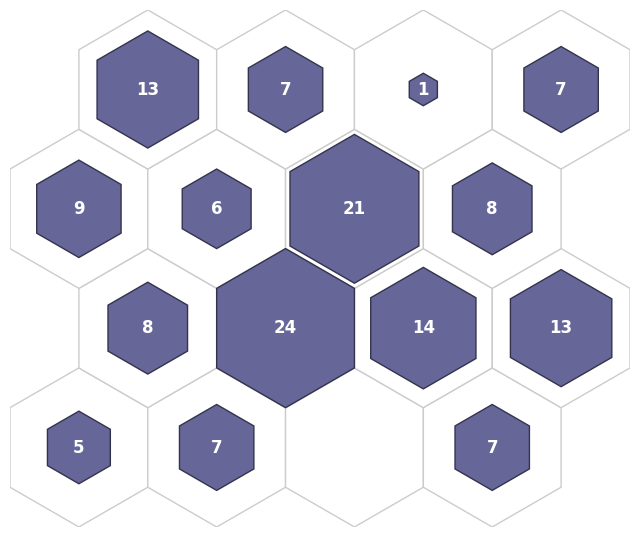

In [24]:
fig, ax, patches, text = som.plot('hit_hist', data_dict)
plt.show()

Neighborhood Connection Map

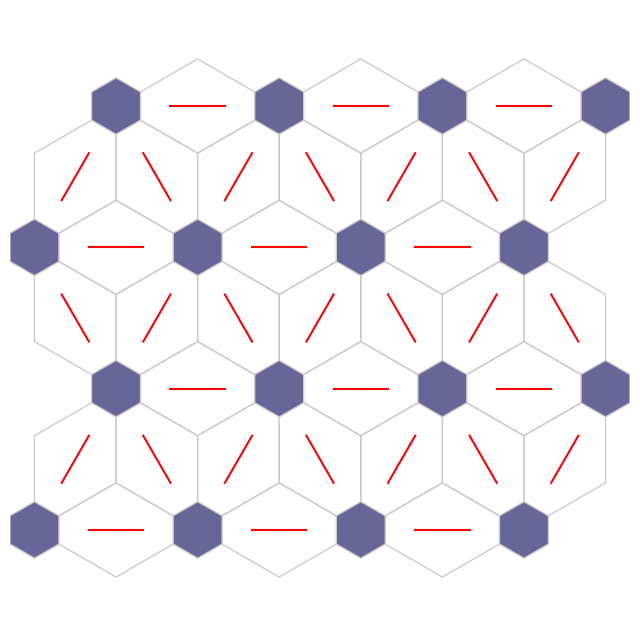

In [26]:
fig, ax, patches = som.plot('neuron_connection')
plt.show()

Distance map

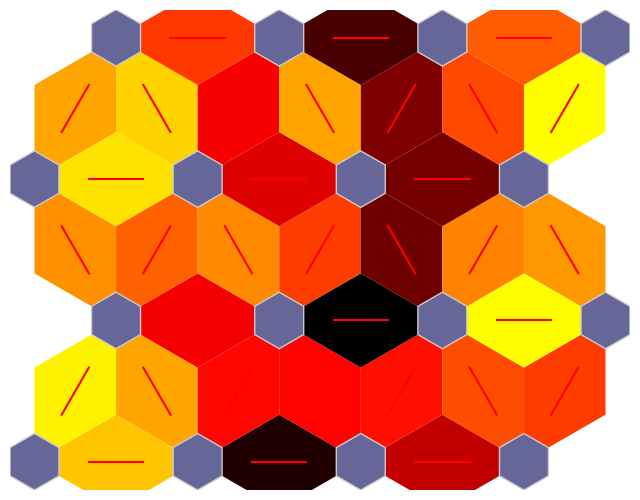

In [27]:
fig, ax, patches = som.plot('neuron_dist')
plt.show()

Weight Position Plot

Weight as line plot

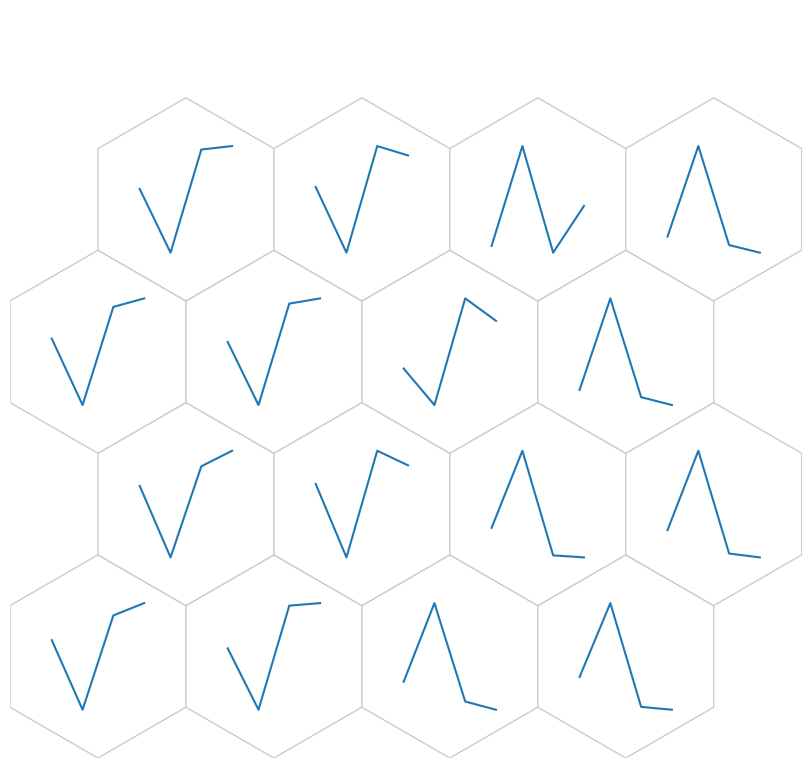

In [28]:
fig, ax, h_axes = som.plot('wgts')
plt.show()

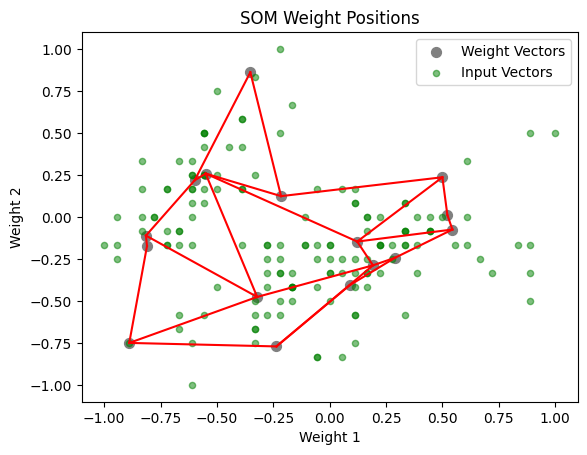

In [29]:
som.plot('component_positions', data_dict)

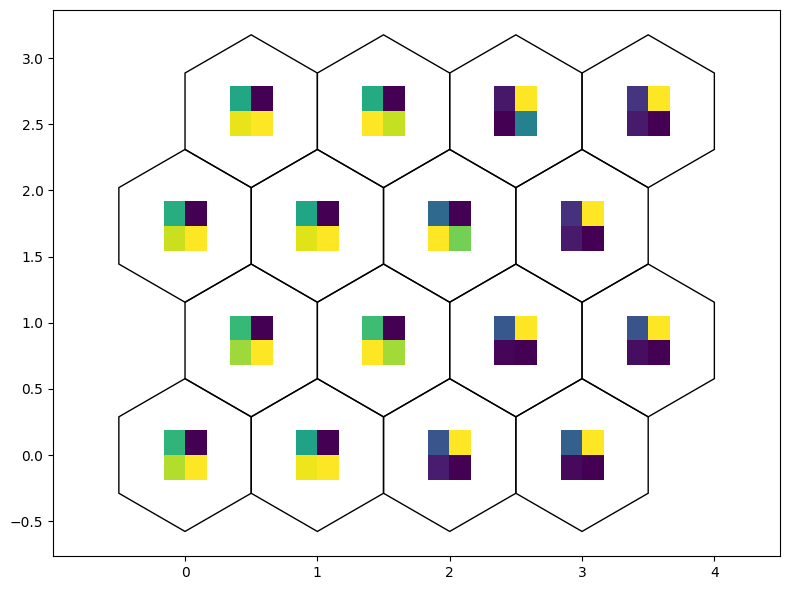

In [31]:
fig, ax, patches = som.weight_as_image()
plt.show()